In [155]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import matplotlib as mpl

key="full_width_10"

if key == "full_width_g":
    w=4.7
    h=w/1.618

if key == "insert":
    w=4.7/2*(30/41)
#    h=w/1.618
    h=2*30/41

if key == "half_width_g":
    w=4.7/2
#    h=w/1.618
    h=2
if key == "full_width_10":
    w=4.7
    h=6

mpl.rcParams['figure.figsize'] = [w, h]
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

In [115]:
im=np.genfromtxt('100.asc')[10:,10:]
bg=np.genfromtxt('bg.asc')[10:,10:]

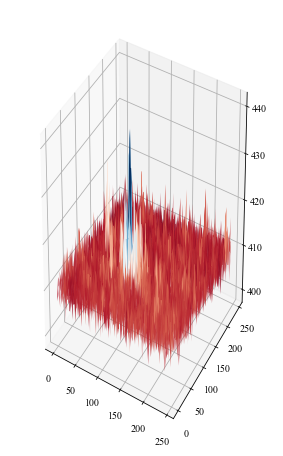

In [116]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y=np.meshgrid(np.arange(len(im[0]-1)), np.arange(len(im-1)))
surf = ax.plot_surface(X,Y, im, linewidth=1, cmap=cm.RdBu)
plt.show()


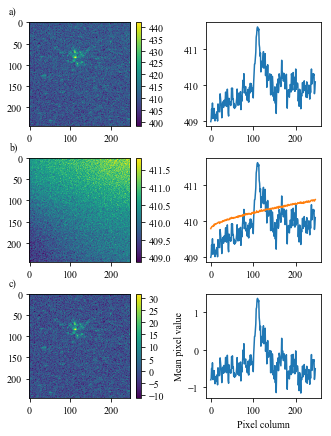

In [143]:
f=.07

plt.subplot(321)

plt.imshow(im,cmap=cm.viridis,aspect='auto')
plt.colorbar(fraction=f)
plt.text(-50,-20,'a)')

plt.subplot(323)

plt.imshow(bg/200,cmap=cm.viridis,aspect='auto')
plt.colorbar(fraction=f)
plt.text(-50,-20,'b)')

plt.subplot(325)

res=im-bg/200
offset=np.mean(res[200:,:50])
plt.imshow(res,cmap=cm.viridis,aspect='auto')
plt.colorbar(fraction=f)
plt.text(-50,-20,'c)')

plt.subplot(322)
plt.plot(np.mean(im,axis=0))

plt.subplot(324)
plt.plot(np.mean(im,axis=0))
plt.plot(np.mean(bg/200,axis=0))

plt.subplot(326)
plt.plot(np.mean(res,axis=0))

plt.ylabel('Mean pixel value')
plt.xlabel('Pixel column')

plt.tight_layout()

plt.savefig('bg_subtract.pdf',bbox='tight')

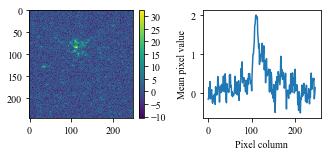

In [157]:
plt.subplot(322)
plt.plot(np.mean(res-offset,axis=0))

plt.ylabel('Mean pixel value')
plt.xlabel('Pixel column')

plt.subplot(321)

plt.imshow(res-offset,cmap=cm.viridis,aspect='auto')
plt.colorbar(fraction=f)

plt.tight_layout()

plt.savefig('bg_offset_subtract.pdf',bbox='tight')